In [1]:
import pandas as pd
import numpy as np
import sklearn
np.random.seed = 2025
from sklearn.datasets import load_iris


In [2]:
iris = load_iris()
print ('data contains:',iris.keys())
X, y, labels, feature_names  = iris.data, iris.target, iris.target_names, iris['feature_names']
df_iris= pd.DataFrame(X, columns= feature_names) 
df_iris['label'] =  y
features_dict = {k:v for k,v in  enumerate(labels)}
df_iris['label_names'] = df_iris.label.apply(lambda x: features_dict[x])
df_iris

data contains: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,label_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)




In [ ]:
from sklearn.neighbors import KNeighborsClassifier
columns = ['k', 'score']
df_tests = pd.DataFrame(columns=columns)
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train, )
    df_tests.loc[len(df_tests)] = [i, knn.score(X_test, y_test)]
df_tests



,k,score
0,1.0,1.000000
1,2.0,1.000000
2,3.0,1.000000
3,4.0,1.000000
4,5.0,1.000000
...,...,...
94,95.0,0.566667
95,96.0,0.566667
96,97.0,0.566667
97,98.0,0.566667


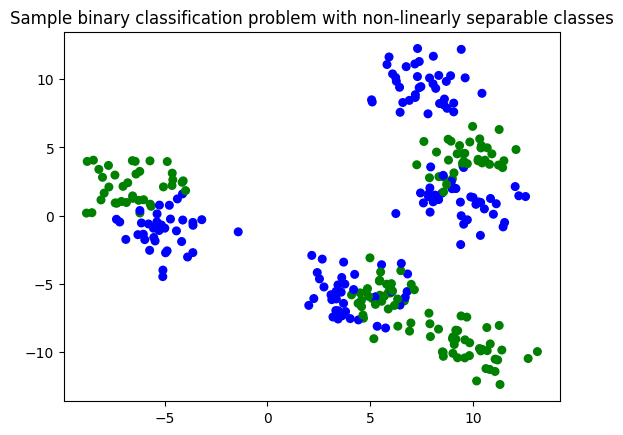

In [5]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['blue','#FFFF00','black','green'])

np.random.seed= 2025
X_D2, y_D2 = make_blobs(n_samples = 300, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=30, cmap=cmap_bold)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, test_size=0.2, 
                                                    random_state=69)

df_tests_2 = pd.DataFrame(columns=columns)
                                            
for i in range(1,100):
    knn_2 = KNeighborsClassifier(n_neighbors=i)
    knn_2.fit(X_train, y_train)
    df_tests_2.loc[len(df_tests_2)] = [i, knn_2.score(X_test, y_test)] 
df_tests_2.sort_values( by='score', inplace=True, ascending=False)
df_tests_2




,k,score
18,19.0,0.950000
16,17.0,0.950000
6,7.0,0.950000
23,24.0,0.950000
21,22.0,0.950000
...,...,...
83,84.0,0.550000
95,96.0,0.533333
97,98.0,0.533333
96,97.0,0.516667


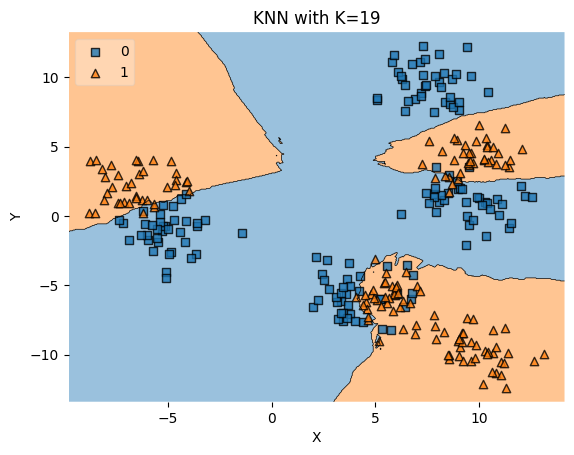

In [11]:

import matplotlib.pyplot as plt


knn_2 = KNeighborsClassifier(n_neighbors=19)
knn_2.fit(X_train, y_train)
from mlxtend.plotting import plot_decision_regions 
plot_decision_regions(X_D2, y_D2, clf=knn_2, legend=2)  

plt.xlabel('X')  
plt.ylabel('Y')
plt.title('KNN with K=19')

plt.show()
